<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Asemaneh Nafe


In [1]:
student_number = '401106469'
full_name = 'Amir Mohhammad Mahfoozi'
assert student_number and full_name is not None, 'please input your information'

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

<font color=red size=3>
notice that you can not use sklearn.decomposition and sklearn.cluster libary in this home work! you should implement pca and kmeans from scratch.

## Overview
In this assignment, you will perform PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. You will compare the clustering performance both before and after PCA. Additionally, you'll be asked to explain the theory and decisions behind each step.

## Data Preprocessing (15 points)
Read the dataset.CSV file and display a few samples.

In [4]:
# todo
df = pd.read_csv('dataset.csv')

# Display the first few samples
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

Display dataset information.

In [5]:
# todo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Which column do you think might be the most irrelevant for PCA and clustering?
<br>
Answer:  The CUST_ID column is the most irrelevant for PCA and clustering as it does not provide any useful information for the analysis of customer behavior.

In [6]:
# Exclude irrelevant feature
df_cleaned = df.drop(columns=['CUST_ID'])

print(df_cleaned.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

how do you handle missing data, and why did you choose this method?
<br>
Answer: Imputing with mean of data
 It allows you to retain all available data, which can be particularly beneficial when the percentage of missing values is low.

In [7]:
#Fill missing data
df_cleaned = df_cleaned.fillna(df_cleaned.mean())
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

plot the correlation matrix and identify redundant features.remove them from the dataframe.

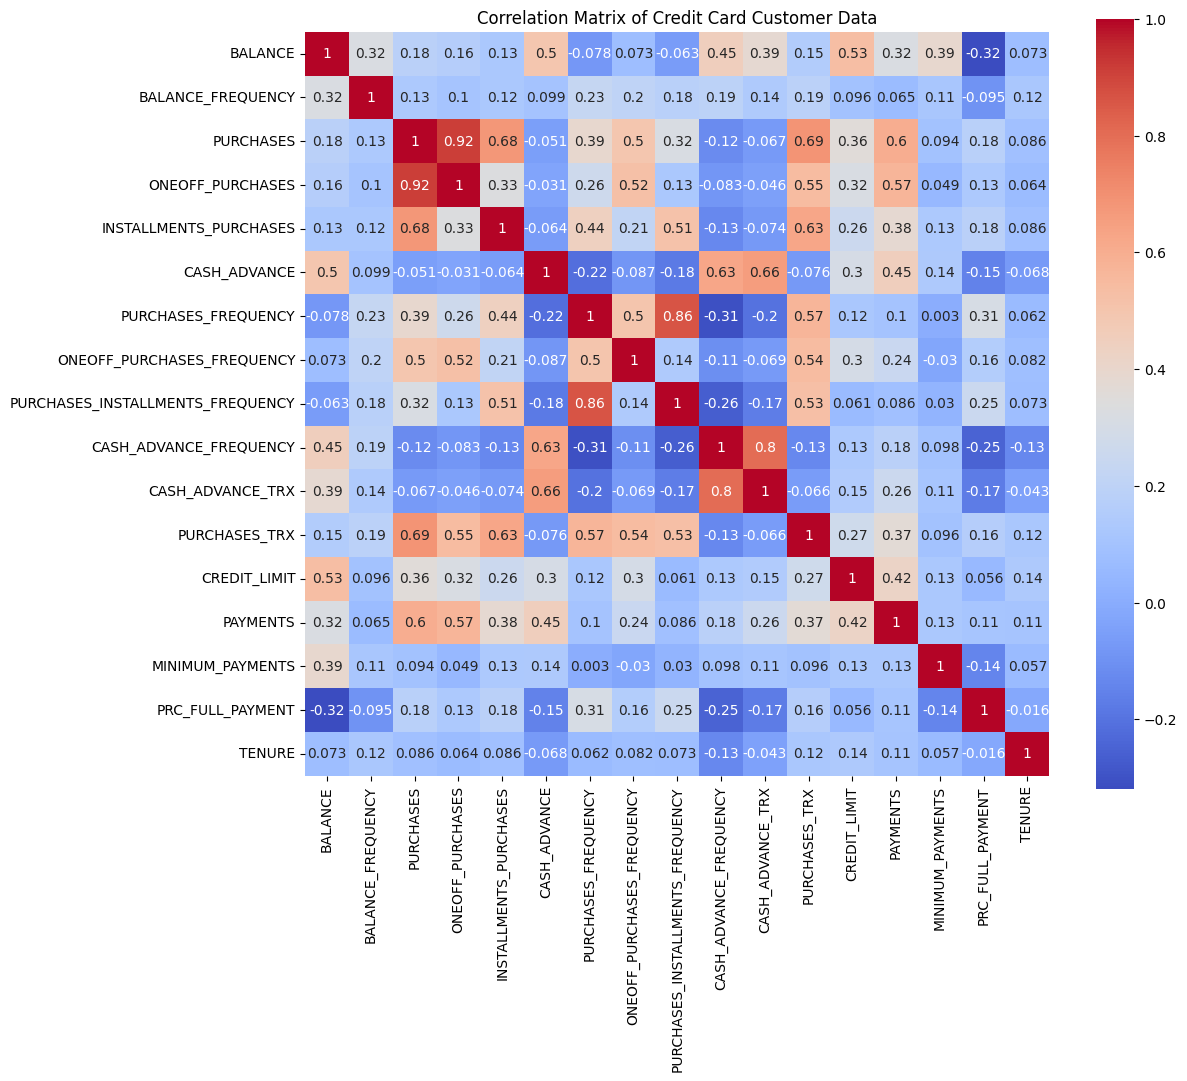

In [10]:
# Plot the correlation matrix
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Credit Card Customer Data")
plt.show()

In [11]:
threshold = 0.8

correlation_matrix = df_cleaned.corr().abs()

redundant_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > threshold:
            colname = correlation_matrix.columns[j]
            redundant_features.add(colname)

print(redundant_features)
df_cleaned = df_cleaned.drop(columns=redundant_features)

{'ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY'}


## Standardize the Data (5 points)
Standardize the dataset using z-score normalization

In [12]:
# todo
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_cleaned)
df_standardized = pd.DataFrame(df_standardized, columns=df_cleaned.columns)
print(df_standardized.head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0 -0.731989          -0.249434  -0.424900               -0.349079   
1  0.786961           0.134325  -0.469552               -0.454576   
2  0.447135           0.518084  -0.107668               -0.454576   
3  0.049099          -1.016953   0.232058               -0.454576   
4 -0.358775           0.518084  -0.462063               -0.454576   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0     -0.466786            -0.806490                   -0.678661   
1      2.605605            -1.221758                   -0.678661   
2     -0.466786             1.269843                    2.673451   
3     -0.368653            -1.014125                   -0.399319   
4     -0.466786            -1.014125                   -0.399319   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960433   
1                0.57396

Why is it important to standardize the data before applying PCA?
<br>
Answer:Standardizing the data before applying PCA (Principal Component Analysis) is crucial because PCA is sensitive to the scale of the features. Here are the main reasons why standardization is important:

Equal Contribution of Features: PCA identifies directions (principal components) that maximize variance in the data. If features have different scales (e.g., income in thousands and age in years), the larger-scaled features will dominate the variance, making PCA components align primarily with those features. Standardization ensures that each feature contributes equally to the analysis, allowing PCA to capture meaningful patterns across all features.

What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer:
StandardScaler:
Objective: Standardizes features by eliminating the mean and scaling with standard deviation to achieve unit variance.
How It Works: Transformation is done such that every feature (column) has a mean of 0 and standard deviation 1. This is done by determining Z score for each individual value.(x - mean)/standard deviation

Normalization
Objective: Normalizes single input sample to L2 norm.
How it works: Each input sample (row) is resized on its own, with the values rescaled to give that sample vector a unit norm (eg. L2 vector, which scales the square of the elements to summation of 1). L2 normalization equation

For many reasons, StandardScaler is the one that can be used better with PCA. This is because PCA is performed first on the covariance matrix and this supports the fact that the features are of equal scale, that is, standardised. Each feature is defined to have a mean of 0 and standard deviation of 1 in StandardScaler, this allows PCA to organize the data by directions of maximum variance without discrimination arising from the features which bear large values.


## Principal Component Analysis (PCA) (35 points)
Implement PCA from scratch.

In [13]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        self.components = None  # To store the principal components (eigenvectors)
        self.mean = None        # To store the mean of the data (used for centering the data)
        self.explained_variance_ratio = None  # To store the explained variance ratio of the components

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        covariance_matrix = np.cov(X_centered, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        if self.n_components is not None:
            eigenvectors = eigenvectors[:, :self.n_components]
            eigenvalues = eigenvalues[:self.n_components]

        self.components = eigenvectors
        self.explained_variance_ratio = eigenvalues / np.sum(eigenvalues)


    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        # Return the transformed data
        X_centered = X - self.mean

        X_transformed = np.dot(X_centered, self.components)
        return X_transformed

    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        """
        Return the principal components (eigenvectors).
        """
        return self.components

### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer: as we can see below 6 componenets are enough fot 75%

[0.25955933 0.48690076 0.5756843  0.65298287 0.72035342 0.7774061
 0.83174369 0.87654087 0.91468005 0.94597155 0.96661961 0.98378926
 1.        ]


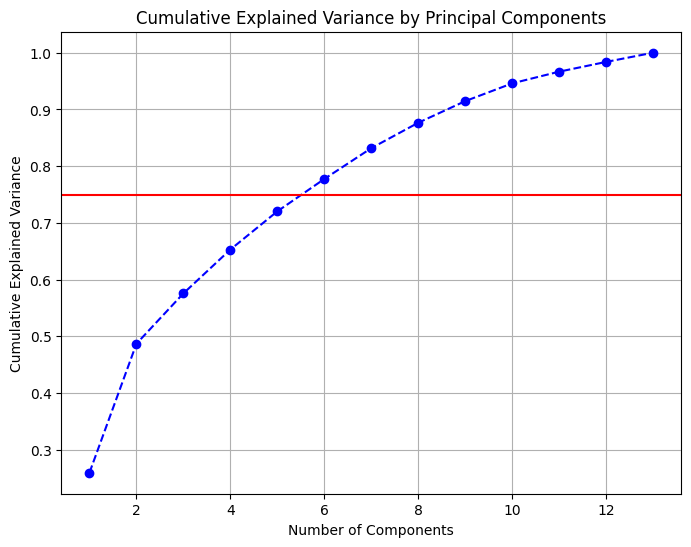

In [16]:
# todo
pca = CustomPCA(n_components=13)

pca.fit(df_standardized)

X_pca = pca.transform(df_standardized)
cumulative_variance = np.cumsum(pca.get_explained_variance_ratio())
print(cumulative_variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Principal Components")
plt.axhline(y=0.75, color='r', linestyle='-')
plt.grid(True)
plt.show()

Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [17]:
#Build a new DataFrame with the first slected components
pca = CustomPCA(n_components=6)
pca.fit(df_standardized)
X_pca = pca.transform(df_standardized)
num_selected_components = X_pca.shape[1]
columns = [f"PC{i+1}" for i in range(num_selected_components)]
pca_df = pd.DataFrame(X_pca, columns=columns)
print(pca_df.head())
pca_df.to_csv('pca_output.csv', index=False)

        PC1       PC2       PC3       PC4       PC5       PC6
0  1.728541  0.833445 -0.384363 -0.429897 -0.118070  0.486503
1  0.312835 -2.531537  0.615274 -0.912451 -0.845063  0.004857
2 -1.197318  0.883804 -1.177909  1.172951 -1.072885 -1.898819
3  0.904752 -0.002158 -0.236403 -1.354837 -0.441498 -0.780313
4  1.498611  0.526780 -0.787691 -0.088656 -0.275036  0.367269


We expect these new features to be orthogonal to each other. Check this and

show the correlation between the features.

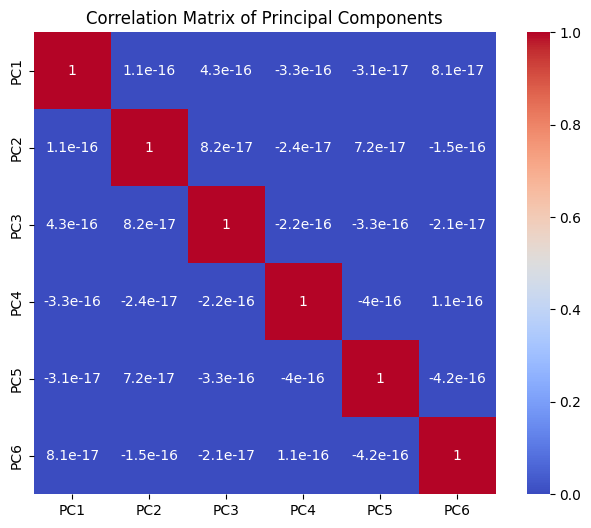

In [19]:
# todo
correlation_matrix = pca_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Principal Components')
plt.show()

## KMeans (45 points)
Implement kmeans from scratch.

In [21]:
import numpy as np

class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        self.inertia_ = None   # To store the inertia (within-cluster sum of squares)
        self.labels_ = None    # To store the label assigned to each data point (cluster assignment)

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """

        np.random.seed(self.random_state)

        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            self.labels_ = self._assign_clusters(X)
            new_centroids = self._update_centroids(X)
            if np.all(new_centroids == self.centroids):
                break

            self.centroids = new_centroids

        self.inertia_ = self._calculate_inertia(X)

        return self

    def _assign_clusters(self, X):
        """
        Assign each data point to the nearest centroid.
        X: Input data (n_samples, n_features)
        Returns: Array of cluster labels for each data point
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X):
        """
        Update centroids as the mean of the assigned points.
        X: Input data (n_samples, n_features)
        Returns: New centroids (n_clusters, n_features)
        """
        return np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])

    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        # Step 1: For each cluster, compute the squared distances of points from their corresponding centroid
        # Step 2: Sum all squared distances to compute inertia
        inertia = 0
        for i in range(self.n_clusters):
            inertia += np.sum((X[self.labels_ == i] - self.centroids[i]) ** 2)
        return inertia

    def predict(self, X):
        """
        Predict the closest cluster for each sample in X.
        X: Input data (n_samples, n_features)
        Returns: Array of cluster labels for each data point
        """
        return self._assign_clusters(X)


### Elbow Method
Apply the elbow method to determine the optimal number of clusters for K-Means. what is the best number of clusters? 5

In [22]:
# Initialize an empty list to store the WCSS values for each number of clusters
WCSS = []

# Apply KMeans for a range of cluster values (from 1 to 30)
for i in range(1, 30):
    # Initialize the CustomKMeans with `i` clusters and a random state of 42
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=42)

    # Fit the model to the PCA-transformed data
    kmeans_pca.fit(X_pca)

    # Append the calculated inertia (WCSS) to the WCSS list
    WCSS.append(kmeans_pca.inertia_)

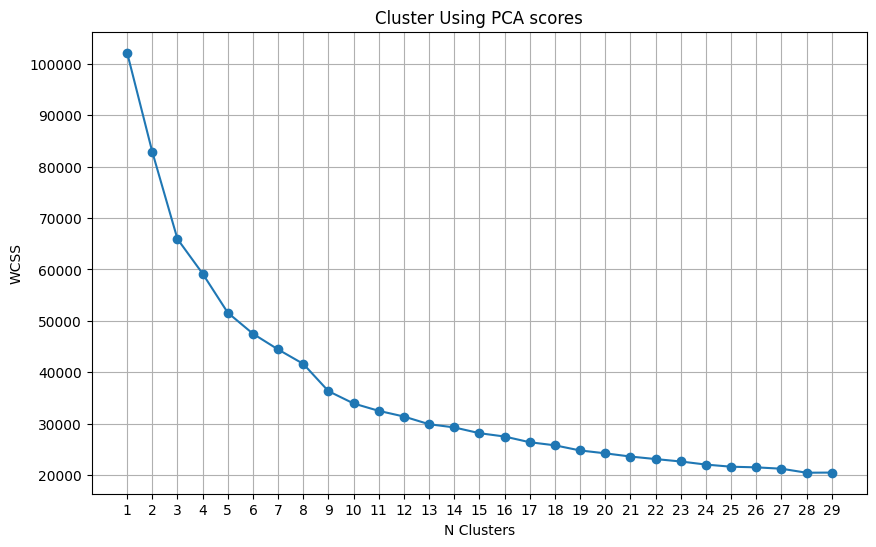

In [23]:
# Plot the Elbow curve using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), WCSS, marker='o', linestyle='-')
plt.title('Cluster Using PCA scores')
plt.xlabel('N Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 30))
plt.grid()
plt.show()

Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [32]:
# Apply KMeans on PCA-reduced data with the optimal number of clusters based on the elbow method
optimal_clusters = 5
kmeans_final = CustomKMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_final.fit(X_pca)

In [33]:
# Add a new column 'segment' to pca data frame and assign the cluster labels to each observation
pca_df['segment'] = kmeans_final.labels_

# Display the first few rows of the updated DataFrame
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6  segment
0  1.728541  0.833445 -0.384363 -0.429897 -0.118070  0.486503        2
1  0.312835 -2.531537  0.615274 -0.912451 -0.845063  0.004857        1
2 -1.197318  0.883804 -1.177909  1.172951 -1.072885 -1.898819        3
3  0.904752 -0.002158 -0.236403 -1.354837 -0.441498 -0.780313        2
4  1.498611  0.526780 -0.787691 -0.088656 -0.275036  0.367269        2


 visualize the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

<Figure size 1200x1000 with 0 Axes>

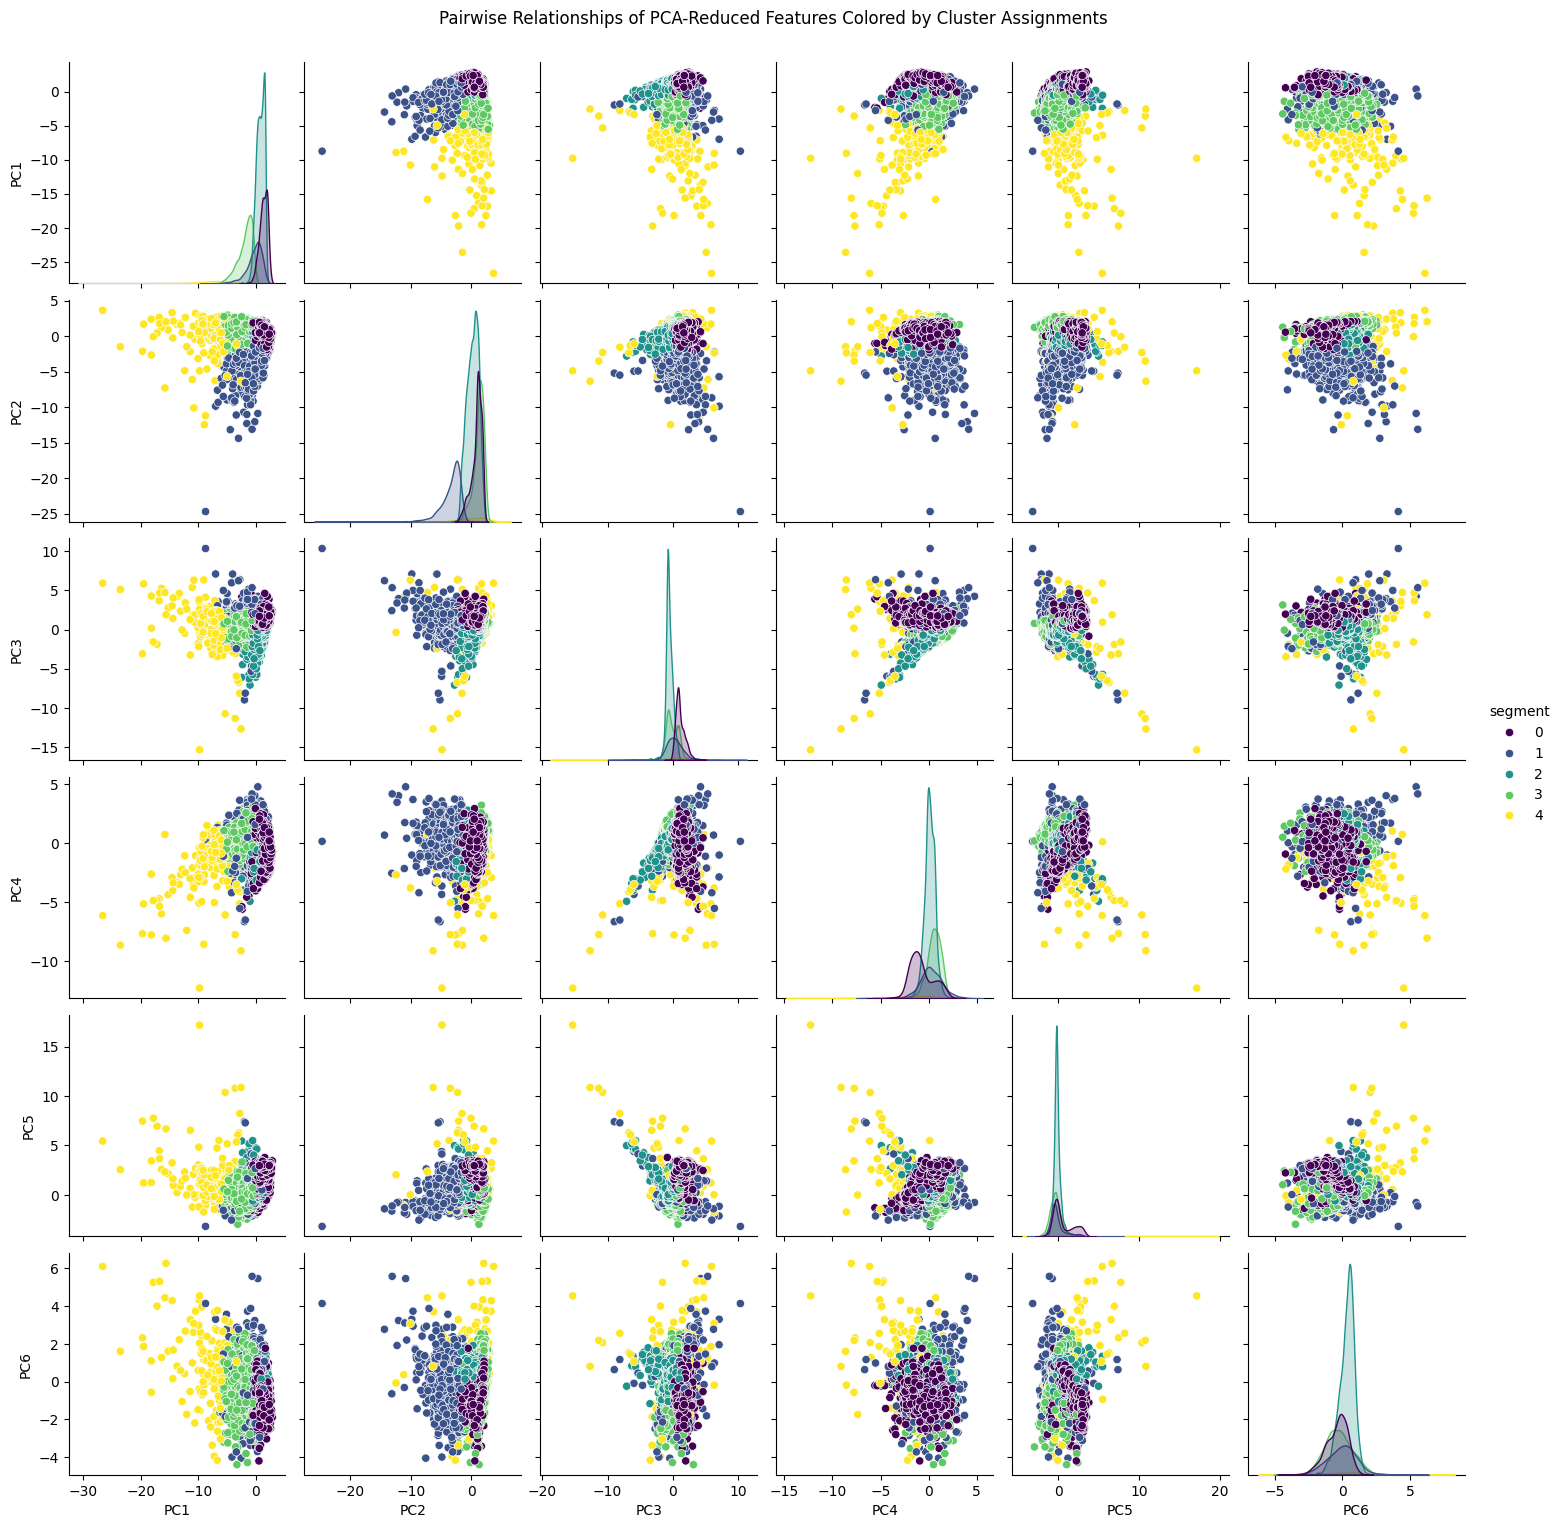

In [34]:
# todo
plt.figure(figsize=(12, 10))
sns.pairplot(pca_df, hue='segment', palette='viridis', markers='o')
plt.suptitle('Pairwise Relationships of PCA-Reduced Features Colored by Cluster Assignments', y=1.02)
plt.show()

So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Perform hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


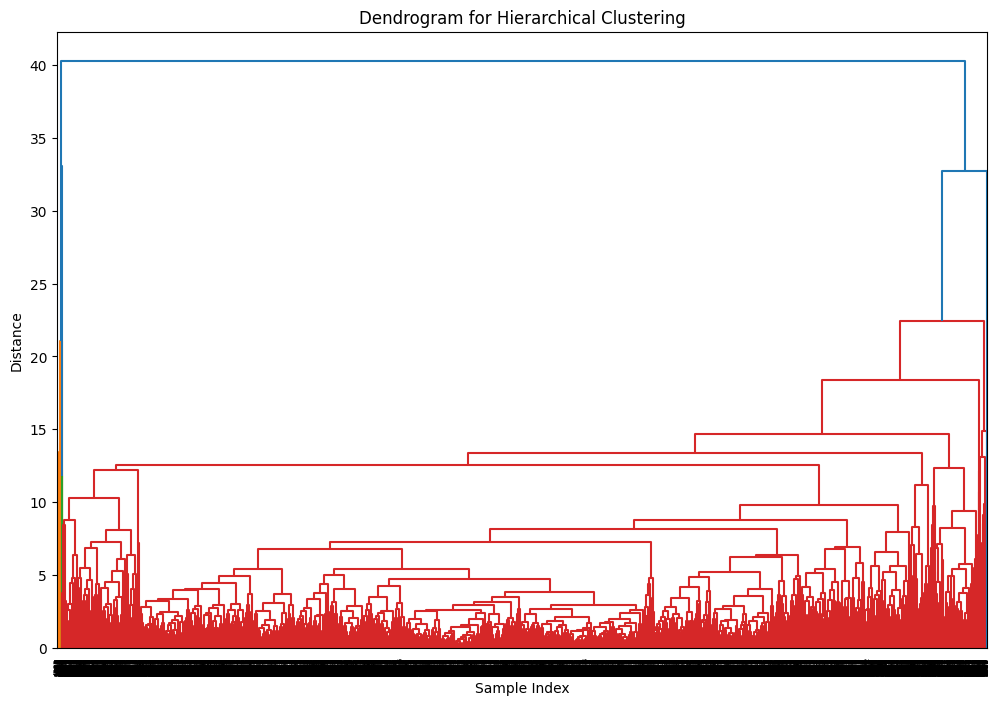

In [35]:
# Perform Hierarchical Clustering on the pca dataset
linked = linkage(X_pca, method='complete')

# Visualize the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

"Use scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters. Then visualize the results using pairplots.

<Figure size 1200x1000 with 0 Axes>

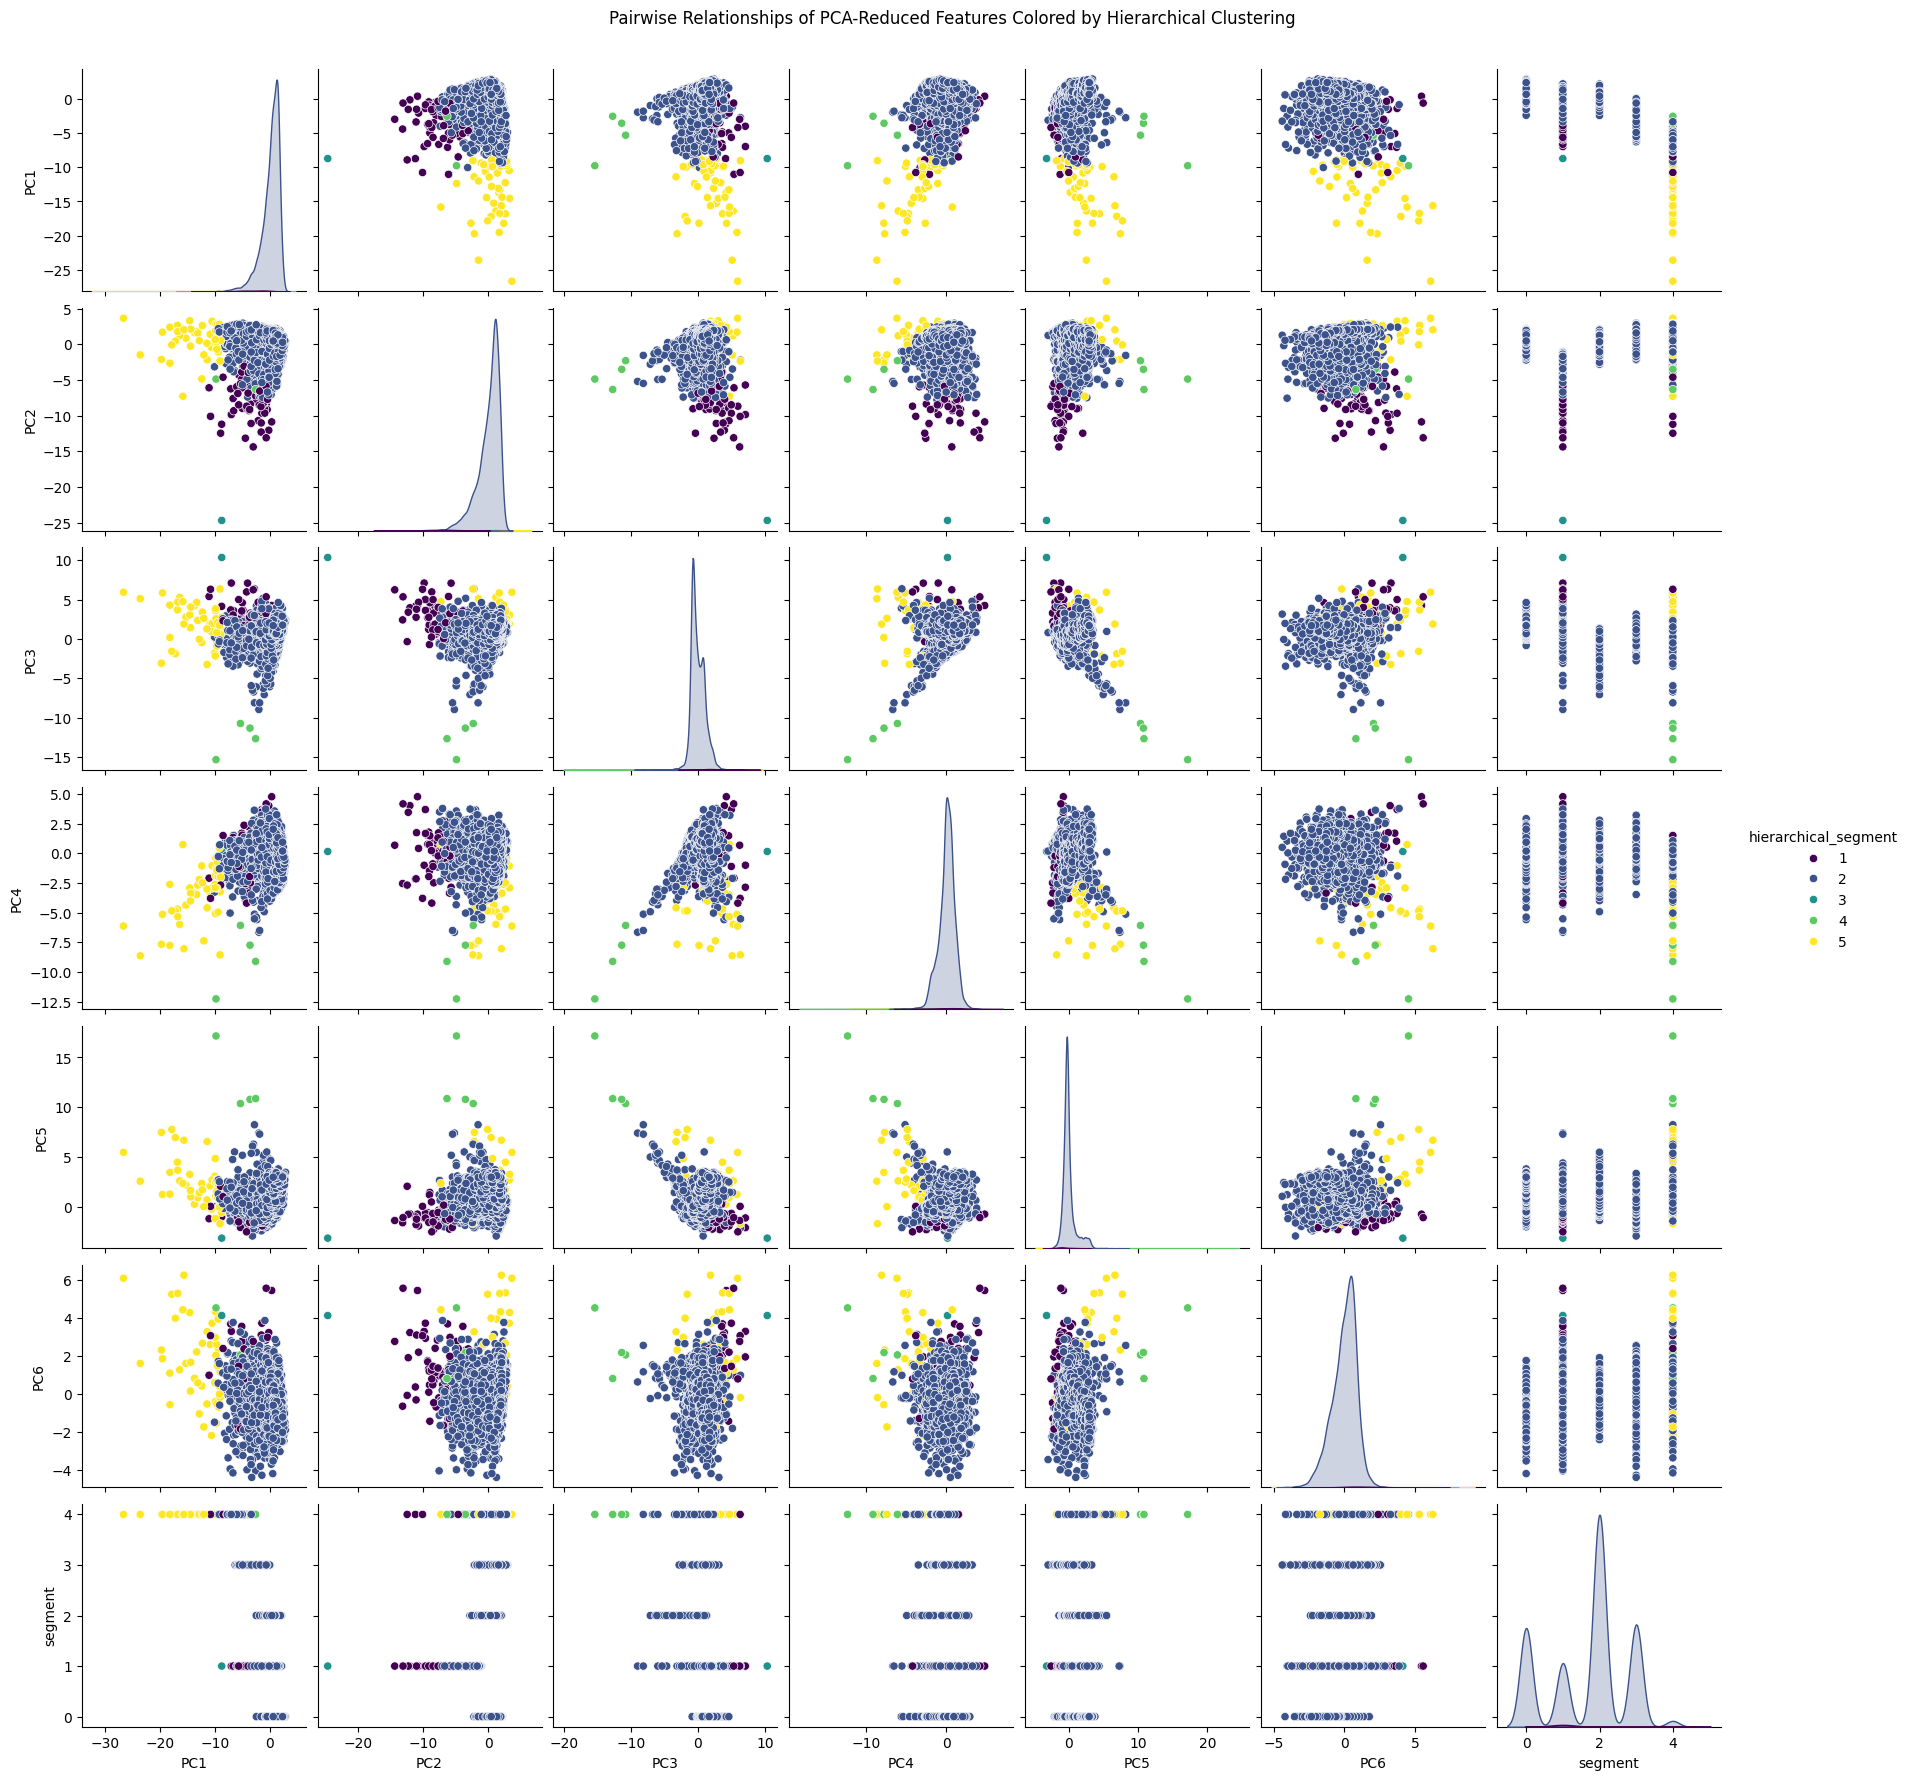

In [36]:
# Choose threshold and assign clusters
max_clusters = 5
cluster_labels = fcluster(linked, max_clusters, criterion='maxclust')

# Assign cluster labels to PCA DataFrame
pca_df['hierarchical_segment'] = cluster_labels

# Visualize using PCA components
plt.figure(figsize=(12, 10))
sns.pairplot(pca_df, hue='hierarchical_segment', palette='viridis', markers='o')
plt.suptitle('Pairwise Relationships of PCA-Reduced Features Colored by Hierarchical Clustering', y=1.02)
plt.show()